k_means_labels :  [0 2 1 3 0 0 1 3 1 3 3 0 0 1 2 1 2 2 0 2 0 0 0 3 1 1 3 0 3 2 1 2 0 2 0 0 0
 0 3 3 3 0 0 1 0 3 1 3 1 2 2 1 0 0 3 2 1 3 1 3 1 1 1 1 1 2 3 2 2 2 2 0 2 3
 1 1 1 1 2 1 0 0 1 3 2 1 1 2 3 0 0 2 0 2 2 3 1 3 0 1 3 1 2 2 0 3 2 2 3 2 3
 3 2 0 2 1 0 1 1 2 1 3 0 3 1 1 0 3 0 2 2 0 1 3 1 2 1 2 3 0 0 0 3 3 1 1 0 0
 1 2 2 1 1 3 3 1 0 3 3 2 3 1 0 0 1 1 2 0 2 3 1 1 0 3 0 3 0 2 1 2 1 3 0 1 1
 1 0 1 2 3 2 1 3 0 1 3 1 3 1 2 2 3 1 2 2 2 1 1 3 3 1 3 3 2 0 3 0 2 2 3 2 2
 0 2 1 3 0 2 0 3 3 3 1 1 0 1 0 3 2 0 1 2 3 3 0 1 1 3 3 2 2 1 2 1 3 3 0 3 1
 2 2 1 2 3 1 1 1 1 0 3 0 0 2 1 1 3 2 2 3 1 3 3 2 1 3 3 3 2 3 2 0 3 2 0 1 0
 3 2 0 2 2 1 0 3 1 0 3 1 1 3 0 3 1 0 2 3 1 2 1 0 0 1 1 0 0 0 1 2 0 0 3 0 2
 2 1 2 1 3 2 3 1 1 0 1 0 0 1 0 3 1 3 2 2 3 1 0 1 2 3 0 0 2 2 1 3 1 1 1 0 1
 2 1 0 2 0 2 3 0 1 1 2 2 0 2 3 3 2 0 3 2 2 1 0 0 3 3 1 1 2 1 3 2 0 0 1 1 2
 1 3 3 1 0 2 3 0 2 3 1 0 0 2 2 0 2 0 2 3 3 0 0 1 0 3 0 0 3 0 1 1 2 2 1 1 2
 3 0 2 3 0 0 2 3 1 2 3 1 3 2 3 2 0 0 2 1 3 0 0 2 2 2 0 3 0 2 2 3 0 1 1 0 1
 0 3 2 

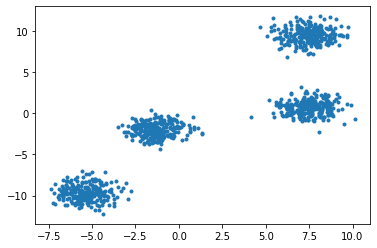

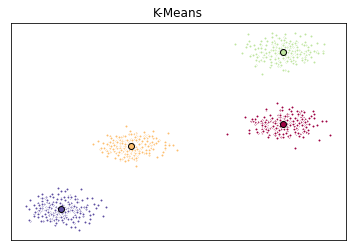

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 랜덤값 고정
np.random.seed(8)
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.')


k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)

k_means_labels = k_means.labels_
print('k_means_labels : ', k_means_labels)

k_means_cluster_centers = k_means.cluster_centers_
print('k_means_cluster_centers : ', k_means_cluster_centers)

# 지정된 크기로 초기화
fig = plt.figure(figsize=(6, 4))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(4), colors):
    my_members = (k_means_labels == k)

    # 중심 정의
    cluster_center = k_means_cluster_centers[k]

    # 중심 그리기
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()


In [9]:
print(X[my_members, 0])

[-5.70171133 -5.11687228 -6.23659157 -5.39000084 -4.16061563 -5.8245176
 -5.88190768 -4.85197968 -6.66682047 -3.8964433  -6.16552127 -6.20729716
 -6.33381666 -5.37354084 -5.64510663 -5.24541745 -4.8113839  -3.23863772
 -4.776371   -5.15159734 -5.67187875 -3.72164483 -5.4370164  -4.69672524
 -5.20560283 -5.87439227 -5.74102786 -5.17589385 -4.60104325 -5.5883331
 -3.53679295 -5.07329916 -4.80293172 -4.39758751 -5.16543359 -5.52100236
 -5.4074501  -6.08530182 -5.15777286 -5.73600298 -7.13400236 -6.48380616
 -6.61779465 -6.31576037 -5.0675052  -5.72977727 -5.08904094 -4.79758196
 -3.73421062 -6.9423161  -4.94784668 -5.10745411 -5.60055238 -6.44668277
 -5.99959551 -5.29151488 -4.17704834 -4.23302628 -5.62366971 -4.47649708
 -6.66397478 -5.99294143 -6.25202258 -4.99178902 -5.44653925 -5.24976969
 -5.44327938 -3.88536805 -4.81870319 -4.11640424 -4.99668704 -6.00660064
 -5.21011546 -3.71155339 -4.33698702 -4.56022103 -5.82283714 -6.20756289
 -5.70567412 -6.45000855 -6.577283   -5.61444542 -5.5